In [16]:
from sklearn.datasets import fetch_openml
import numpy as np

In [30]:
mnist = fetch_openml('mnist_784', version=1)

In [31]:
print(mnist.target.shape)

(70000,)


70 000 images de 28*28 pixels

In [32]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [33]:
sample = np.random.randint(70000, size=5000)

In [34]:
len(sample)

5000

In [35]:
data = mnist.data[sample]
target = mnist.target[sample]

In [36]:
target.shape

(5000,)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.8)

In [43]:
from sklearn import neighbors

In [44]:
model = neighbors.KNeighborsClassifier(n_neighbors=3)

In [45]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
model.predict([x_test[3]])

array(['8'], dtype=object)

In [47]:
y_test[3]

'8'

In [48]:
model.score(x_test, y_test)

0.926

In [49]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

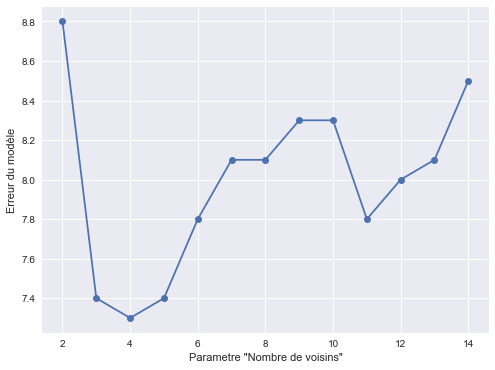

In [50]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    errors.append(100*(1 - knn.score(x_test, y_test)))


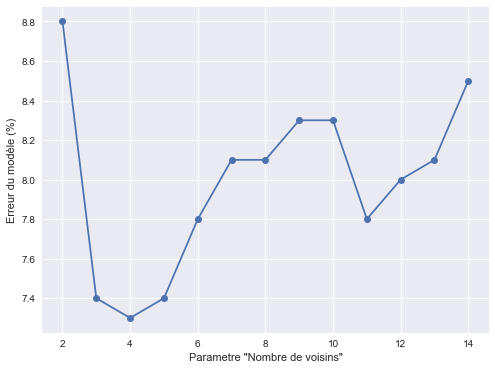

In [52]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(range(2,15), errors, 'o-')
plt.xlabel('Parametre "Nombre de voisins"')
plt.ylabel('Erreur du modèle (%)')
plt.show()  

In [78]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(4)
knn.fit(x_train, y_train)

# On récupère les prédictions sur les données test
predicted = knn.predict(x_test)

# On redimensionne les données sous forme d'images
images = x_test.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)



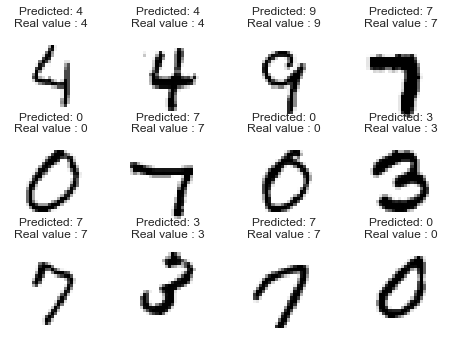

In [79]:
# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(3,4)
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}\nReal value : {}'.format(predicted[value], y_test[value]) )

plt.show()

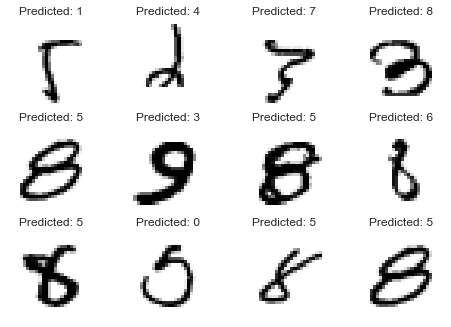

In [82]:
# on récupère les données mal prédites 
misclass = (y_test != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]))

plt.show()